In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)




In [2]:
# Combine the data into a single dataset
combine_data_df = pd.merge(mouse_drug_data, clinical_trial_data, on="Mouse ID", how="left")

#replace all NAN values with 0
combine_data_df = combine_data_df.fillna(0)

# Display the data table for preview

combine_data_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [3]:
# Create new data frame 
tumor_data_timepoint = combine_data_df[["Drug", "Timepoint","Tumor Volume (mm3)"]]

# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_volume_data = tumor_data_timepoint.groupby(["Drug", "Timepoint"])

# Calculate the mean
tumor_volume_data_mean = tumor_volume_data["Tumor Volume (mm3)"].mean()
#tumor_volume_data_mean.head()

#tumor_volume_data_mean.head(100)


# Convert to DataFrame
tumor_response_treatment_df = pd.DataFrame(tumor_volume_data_mean)
tumor_response_treatment_df

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
...                                 ...
Zoniferol 25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

tumor_volume_data_sd = tumor_volume_data["Tumor Volume (mm3)"].sem()

# Convert to DataFrame

tumor_volume_data_sd_df = pd.DataFrame(tumor_volume_data_sd)

# Pivot and Preview DataFrame

tumor_volume_data_sd_df = tumor_volume_data_sd_df.reset_index()

tumor_volume_data_sd_df = tumor_volume_data_sd_df.pivot(index="Timepoint",columns="Drug",values="Tumor Volume (mm3)")

tumor_volume_data_sd_df.head()



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [5]:
# Minor Data Munging to Re-Format the Data Frames
#tumor_response_treatment_sum_df = tumor_response_treatment_df.set_index("Timepoint")

tumor_response_treatment_sum_df = tumor_response_treatment_df.reset_index()

#tumor_response_treatment_sum_df.head()
# Preview that Reformatting worked

#tumor_response_treatment_sum_df = tumor_response_treatment_sum_df.pivot(columns="Drug", values="Tumor Volume (mm3)")
#tumor_response_treatment_sum_df.head()

tumor_response_treatment_sum_df = tumor_response_treatment_sum_df.pivot(index="Timepoint",columns="Drug",values="Tumor Volume (mm3)")
tumor_response_treatment_sum_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


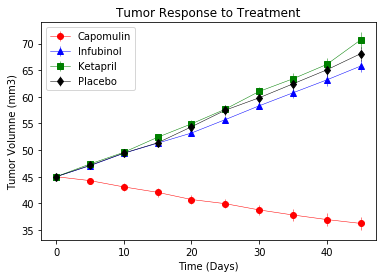

In [34]:
# Generate the Plot (with Error Bars)

plt.errorbar(tumor_response_treatment_sum_df.index,tumor_response_treatment_sum_df["Capomulin"],yerr=tumor_volume_data_sd_df["Capomulin"],color="red", marker= "o", label="Capomulin", linewidth=0.5)
plt.errorbar(tumor_response_treatment_sum_df.index,tumor_response_treatment_sum_df["Infubinol"],yerr=tumor_volume_data_sd_df["Infubinol"],color="blue", marker= "^", label="Infubinol", linewidth=0.5)
plt.errorbar(tumor_response_treatment_sum_df.index,tumor_response_treatment_sum_df["Ketapril"],yerr=tumor_volume_data_sd_df["Ketapril"],color="green", marker= "s", label="Ketapril", linewidth=0.5)
plt.errorbar(tumor_response_treatment_sum_df.index,tumor_response_treatment_sum_df["Placebo"],yerr=tumor_volume_data_sd_df["Placebo"],color="black", marker= "d", label="Placebo", linewidth=0.5)

plt.legend()
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volumne (mm3)")

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [35]:
# Create new data frame 
met_data_timepoint = combine_data_df[["Drug", "Timepoint","Metastatic Sites"]]

# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_volume_data = met_data_timepoint.groupby(["Drug", "Timepoint"])

# Calculate the mean
met_volume_data_mean = met_volume_data["Metastatic Sites"].mean()
#tumor_volume_data_mean.head()

# Convert to DataFrame
met_response_treatment_df = pd.DataFrame(met_volume_data_mean)
#met_response_treatment_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [37]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

met_volume_data_sd = met_volume_data["Metastatic Sites"].sem()

# Convert to DataFrame

met_volume_data_sd_df = pd.DataFrame(met_volume_data_sd)

# Preview DataFrame
met_volume_data_sd_df.head()

#Pivot DataFrame
met_volume_data_sd_df = met_volume_data_sd_df.reset_index()

met_volume_data_sd_df = met_volume_data_sd_df.pivot(index="Timepoint",columns="Drug",values="Metastatic Sites")

met_volume_data_sd_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [10]:
# Minor Data Munging to Re-Format the Data Frames

met_response_treatment_sum_df = met_response_treatment_df.reset_index()

#met_response_treatment_sum_df.head()

# Preview that Reformatting worked


met_response_treatment_sum_df = met_response_treatment_sum_df.pivot(index="Timepoint",columns="Drug",values="Metastatic Sites")

met_response_treatment_sum_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


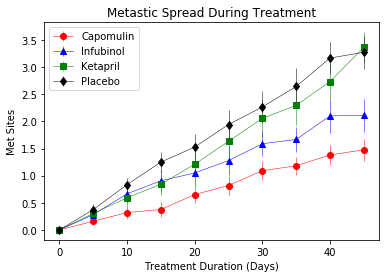

In [39]:
# Generate the Plot (with Error Bars)
plt.errorbar(met_response_treatment_sum_df.index,met_response_treatment_sum_df["Capomulin"],yerr=met_volume_data_sd_df["Capomulin"],color="red", marker= "o", label="Capomulin", linewidth=0.5)
plt.errorbar(met_response_treatment_sum_df.index,met_response_treatment_sum_df["Infubinol"],yerr=met_volume_data_sd_df["Infubinol"],color="blue", marker= "^", label="Infubinol", linewidth=0.5)
plt.errorbar(met_response_treatment_sum_df.index,met_response_treatment_sum_df["Ketapril"],yerr=met_volume_data_sd_df["Ketapril"],color="green", marker= "s", label="Ketapril", linewidth=0.5)
plt.errorbar(met_response_treatment_sum_df.index,met_response_treatment_sum_df["Placebo"],yerr=met_volume_data_sd_df["Placebo"],color="black", marker= "d", label="Placebo", linewidth=0.5)

# Save the Figure
plt.legend()
plt.title("Metastic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met Sites")

plt.show()
# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [12]:
# Create new data frame 
mouse_data_timepoint = combine_data_df[["Drug", "Timepoint","Mouse ID"]]

# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric) 
mouse_data = mouse_data_timepoint.groupby(["Drug", "Timepoint"])

mouse_data_count = mouse_data["Mouse ID"].count()
# Convert to DataFrame

mouse_survival_df = pd.DataFrame(mouse_data_count)
#mouse_survival_df.head()

mouse_survival_df = mouse_survival_df.rename(columns={"Mouse ID":"Mouse Count"})

mouse_survival_df.head()

# Preview DataFrame


Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [13]:
# Minor Data Munging to Re-Format the Data Frames

mouse_survival_sum_df = mouse_survival_df.reset_index()

# Preview the Data Frame


mouse_survival_sum_df = mouse_survival_sum_df.pivot(index="Timepoint",columns="Drug",values="Mouse Count")

mouse_survival_sum_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


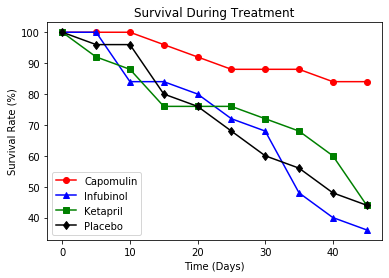

In [42]:
# Generate the Plot (Accounting for percentages)

plt.plot(mouse_survival_sum_df["Capomulin"]/25*100,color="red", marker= "o", label="Capomulin")
plt.plot(mouse_survival_sum_df["Infubinol"]/25*100,color="blue", marker= "^", label="Infubinol")
plt.plot(mouse_survival_sum_df["Ketapril"]/25*100,color="green", marker= "s", label="Ketapril")
plt.plot(mouse_survival_sum_df["Placebo"]/25*100,color="black", marker= "d", label="Placebo")

# Save the Figure
plt.legend()
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [16]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

NameError: name 'fig' is not defined

![Metastatic Spread During Treatment](../Images/change.png)